# Prática 01: Envio de dois pacotes de tamanhos diferentes sem criar novos objetos

Iniciamos o código definindo as bibliotecas necessárias para o projeto, diferente dos hands-On 01 e hands-On 02, incluímos o módulo Wifi e módulo de mobilidade.
Foi acrescentado uma rede sem fio,**10.1.3.0**, à esquerda da topologia anterior, **ponto-a-ponto**.

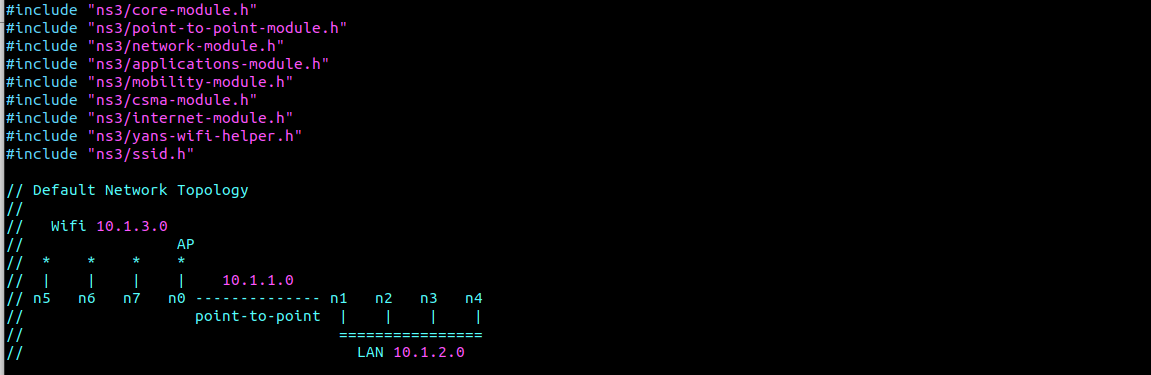

Usando o **using namespace**, agrupamos todas as declarações relacionadas ao projeto em um escopo fora do global
edefinimos o componente de registro, **NS_LOG_COMPONENT_DEFINE**.

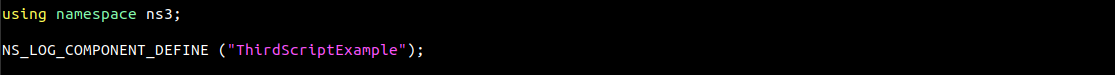

No bloco de comandos abaixo, começamos com a função inicial do código em C++. \
A variável **verbose** é usada na condição abaixo para determinar se os componentes de registro de **UdpEchoClientApplication e UdpEchoServerApplication** estarão habilitados ou desabilitados;\
A variável **tracing** é usada para habilitar o **rastreio pcap**;\
As variáveis **nCsma e nWifi**, definem, respectivamente, a quantidade de nós conectados na **rede nCsma** e dispositivos da **rede  WiFi**.\  
E a linha com a componente **Parse** habilitando a alteração de código via cli sem precisar acessar diretamente o arquivo.\

**Atenção**\
Uma observação a ser seguida é que o $\color{red}{\text{número de dispositivos WiFi não deve ser superior a 18}}$ devido o posicionamento das STAs no grid que ficará pequeno para maiores quantidades.


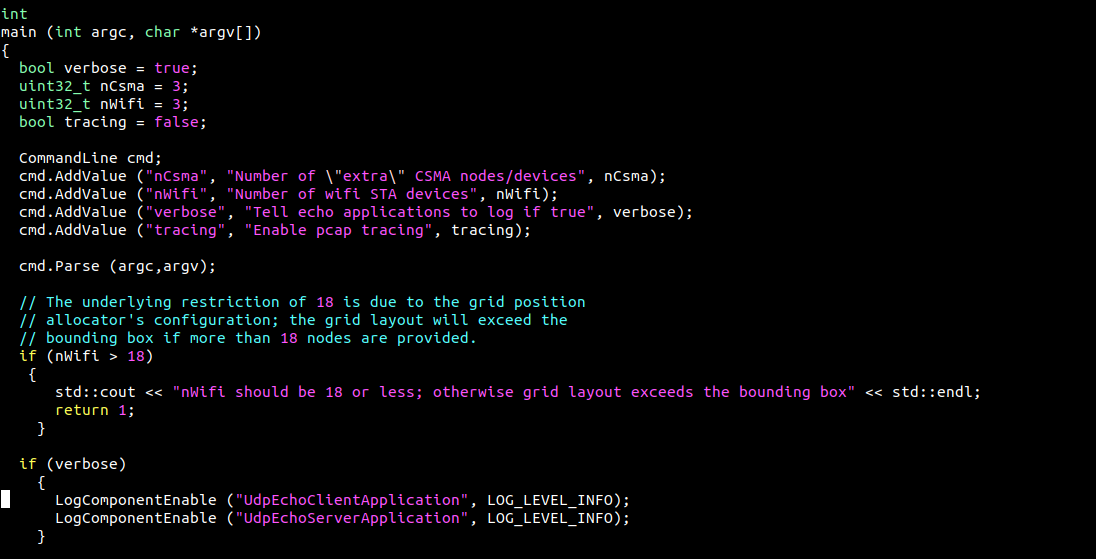

Os passos seguintes são semelhantes aos feitos nos desafios passados:

- Criação dos dois nós que para o enlace ligação ponto-a-ponto;
- Instanciar um **PointToPointHelper** e definir os atributos da transmissão (taxa e atraso);
- Declarar o **NodeContainer** para o nós da rede em P2P;
- Instalar os dispositivos nos nós e o canal entre eles.


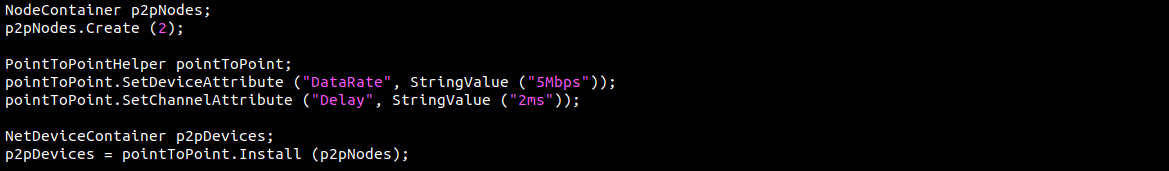

Em seguida, repetimos o feito antes para a **rede Csma**:
- Declarar o **NodeContainer** para o nós da rede em barramento (CSMA);
- Retira o primeiro nó do contêiner ponto-a-ponto e o adiciona ao contêiner CSMA;
- Instanciar um **CsmaHelper** e definir os atributos da transmissão (taxa e atraso);
- Instalar os dispositivos nos nós e o canal entre eles.


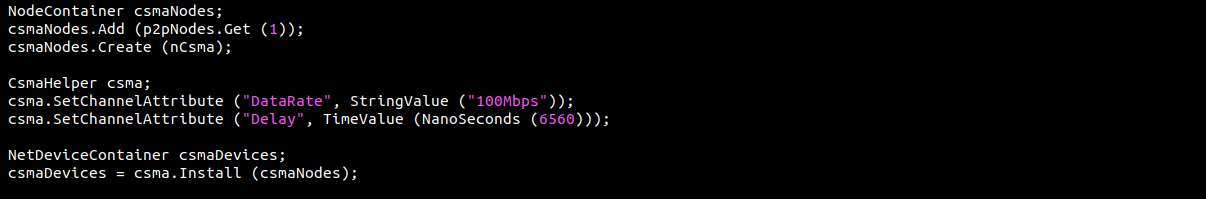

Agora, criamos os nós que farão parte da rede Wifi.\
Iniciamos pelo **NodeContainer wifiStaNodes**, instaniamos a quantidade de nós por meio da variável **nWifi** e pegamos o primeiro nó da rede P2P para ser o ponto de acesso;\
Em seguida, contruímos os dispositivos Wifi e o canal de interligação entre esses nós por meio do método padrão   **YansWifiChannelHelper::Default e YansWifiPhyHelper::Default.**\
Após os objetos estarem instanciados, criamos um objeto de canal e associamos ele ao nosso gerente de objetos da camada PHY.\
Em seguida, nos beneficiamos do assistente **WifiHelper** para criamos o objeto **wifi**.\
O objeto wifi tem como default o **padrão Wi-Fi 802.11a** e o algoritmo de adaptação **ns3::ArfWifiManager**.\
É possível alterar o algoritmo de adaptação por meio do método **setRemoteStationManager**.\
O método **SetRemoteStationManager** diz ao assistente o tipo de algoritmo de controle de taxa a usar, utilizamos o algoritmo **AARF**.\
Mais uma vez, nos beneficiamos do assistente **WifiMacHelper** que ajudará a criar um modelo de camada MAC para as STAs e para configurar o AP.\
Em seguida, configuramos o tipo de MAC, o SSID da rede de infraestrutura, e nos certificamos que as estações não
realizam sondagem ativa (active probing), ou seja, as solicitações de sondagem não serão enviadas pelos MACs criadas pelo assistente.\
Por fim,podemos invocamos o método para instalar e criar os dispositivos Wifi.


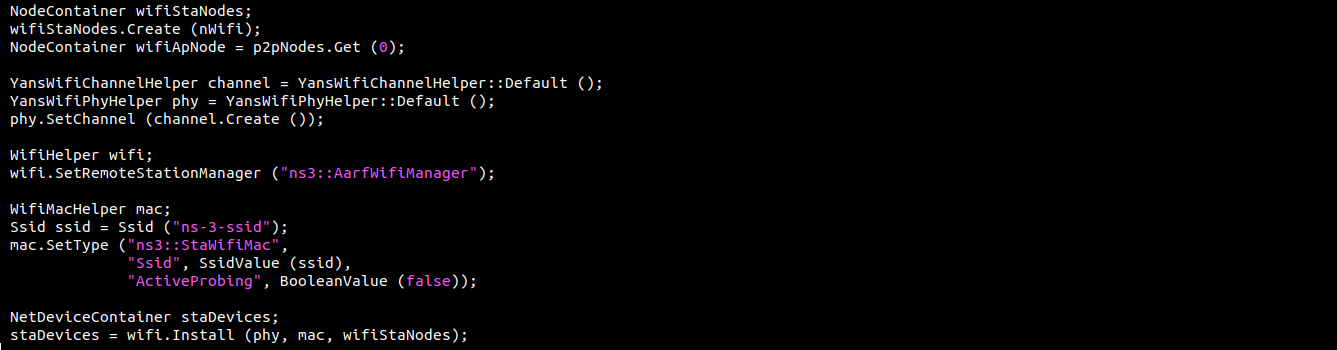

Agora, vamos configurar o *Acess Point*./
O AP recebe as mesmas configurações da camada PHY das Stas e na camada MAC, a configuração é alterada para que ele se comporte como um AP.\
Logo abaixo, o modelo de mobilidade para a rede Wi-Fi é configurado e definido o tamanho do grid no qual as estações poderão se movimentar.\
O modelo **RandomWalk2dMobilityModel** é escolhido de modo que as STAs se movimentem de forma aleatória.\
Instalamos o modelo nas estações e definimos o modelo **ns3::ConstantPositionMobilityModel** para que o AP fique fixado.\
Enfim, instalamos ao AP.    


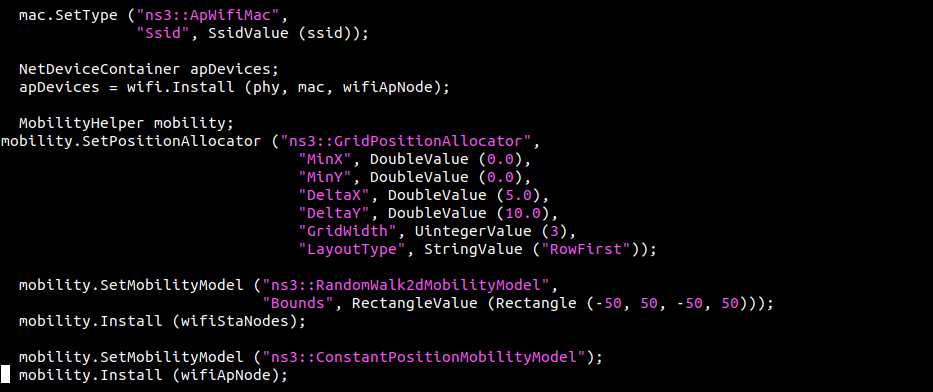

Com os nós, dispositivos, canais e modelos de mobilidade configurados, implantamos a pilha de protocolos, com ajuda do **InternetStackHelper**,  e atribuímos os devidos IP's as interfaces e dispositivos.

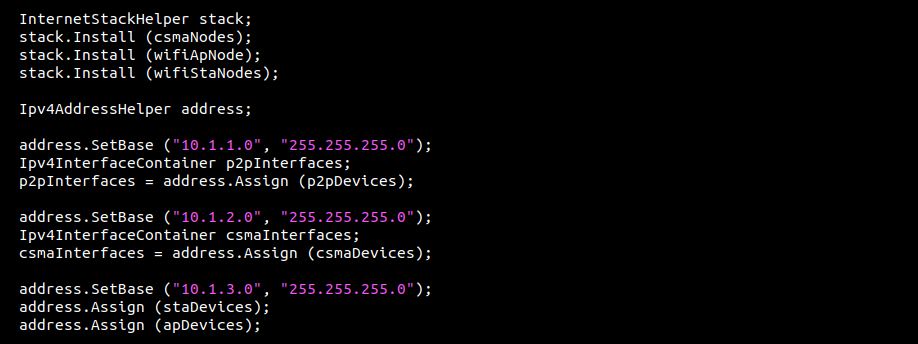

Configuramos o servidor de eco criando um UdpEchoServerHelper e fornecemos o atributo obrigatório do construtor que é o número da porta e instalada no nó, tornando-se o servidor, mais a direita da rede CSMA.\
Assim como, definimos o tempo de tráfego.

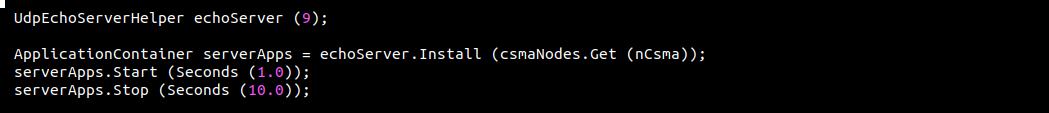

Como o desafio solicita o envio de três pacotes iguais de STA's diferentes, criamos 3 **ApplicationContainer** diferentes (1 para cada nó)e instalamos as aplicações aos útimos nós do barramento CSMA.

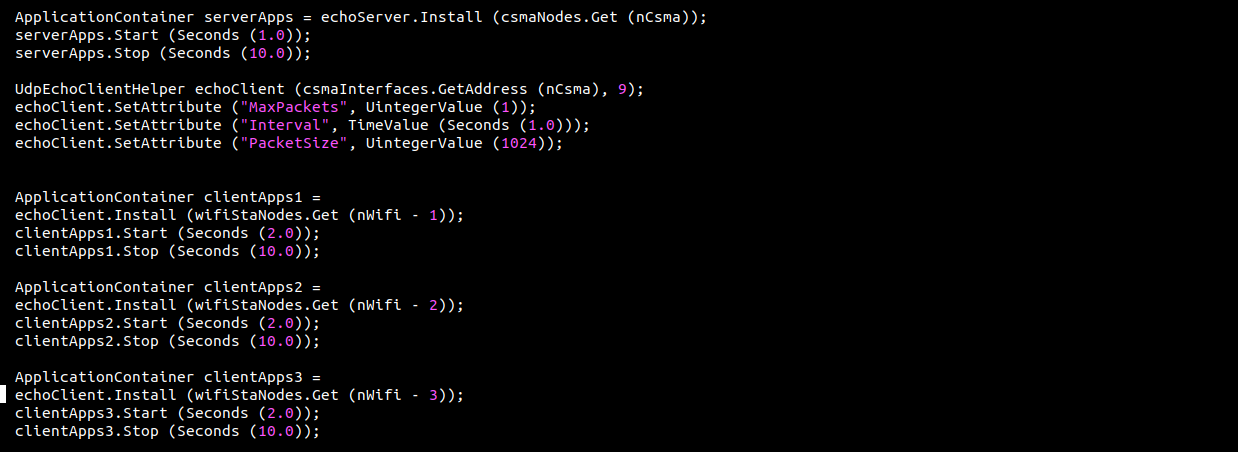

Finalizamos, criando a tabela de roteamento.\
A linha de parada é necessária para que não entre em *loop infinito* devido a geração dos *beacons* pelo *Acess Point*.\
A condição abaixo irá rastrear as 03 redes e gerar os arquivos .pcap se a variável **tracing** for **True**.\
Para a a rede P2P será rastreado todos os nós, enquanto que para a rede CSMA será feito o rastreio do último nó  a rede e a rede Wi-Fi, apenas no AP.


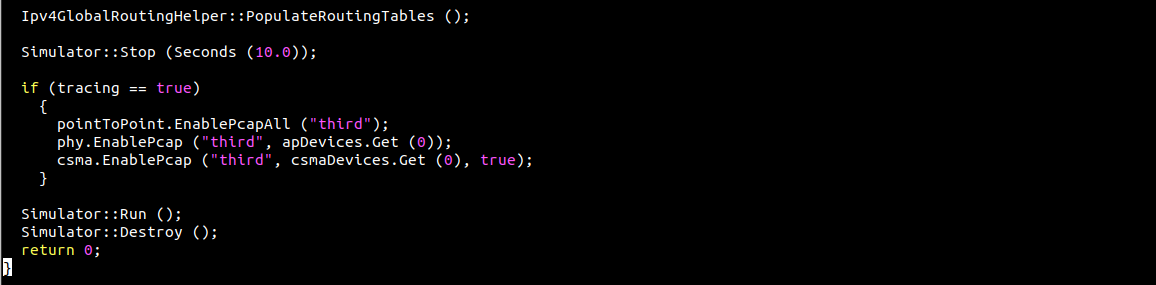

**Parte 1.1 : Envio de 3 Pacotes iguais de STA's Diferentes**

Acessando o diretório **cd ns3-Eclipse** e executando o script **handsON03p1** por meio do comando **./waf**, obtemos o seguinte resultado da simulação.\
O envio de três pacotes de 1024 bytes enviados pela porta 9.

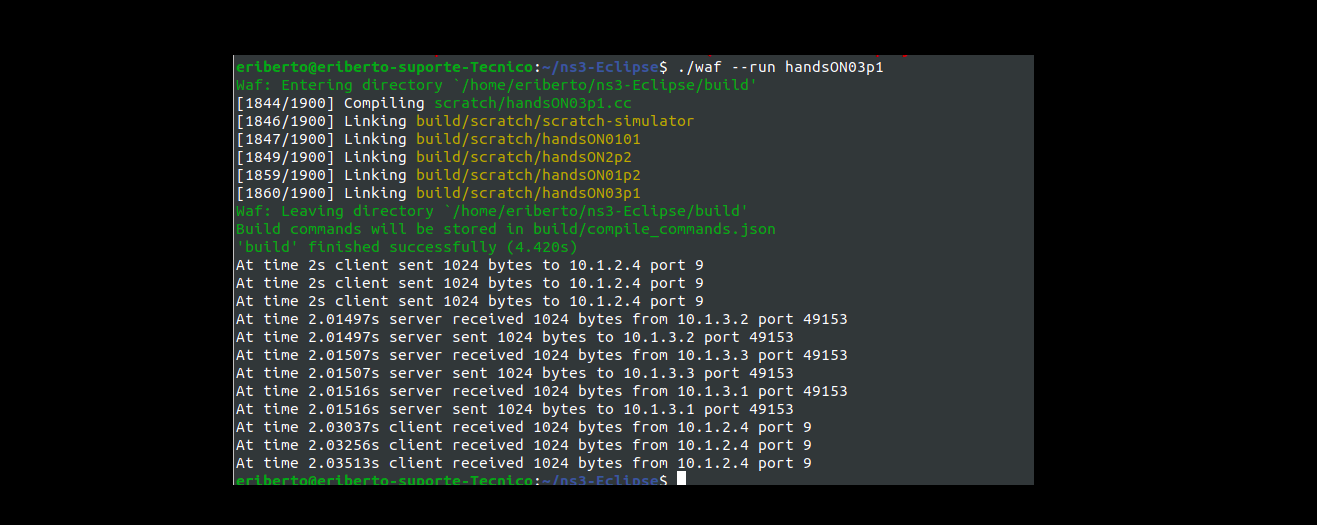

**Parte 1.2 : Envio de 3 pacotes distintos de STA's Diferentes**

Para atender esse requisito, basta alterar a variável **PacketSize**, conforme imagem abaixo:

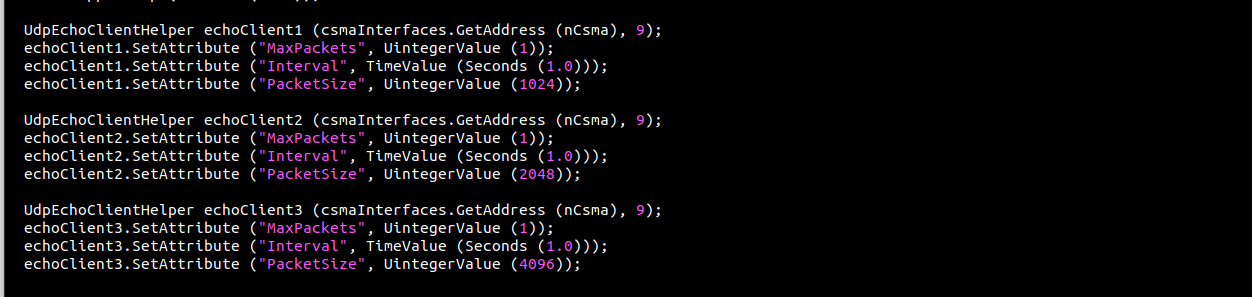

Como resultado da alteração, temos:

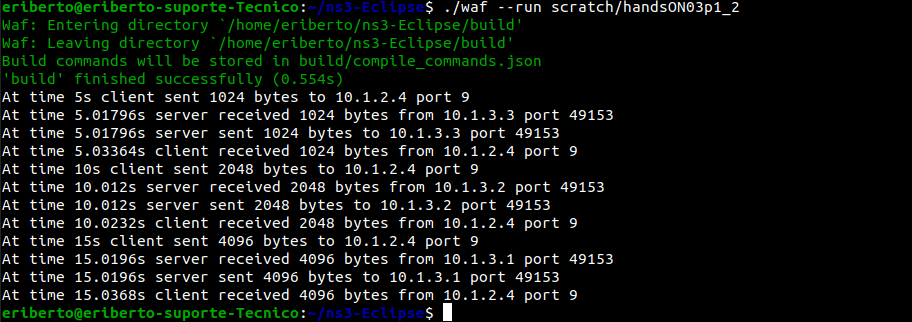

**Parte 1.3 : Envio de vários pacotes com intervalos de tempos distintos**

Para enviarmos vários pacotes e intervalos de tempo distintos, precisamos alterar  tempo de parada do servidor, já que o terceiro nó terá um intervalo maior.\
Além disso, as aplicações que terão as seguintes configurações:
- Cliente 1 enviará 03 pacotes de tamanho 1024 bytes cada e intervalo de 0.4s; 
- Cliente 2 enviará 04 pacotes de tamanho 2048 bytes cada e intervalo de 0.8s;
- Cliente 3 enviará 05 pacotes de tamanho 4096 bytes cada e intervalo de 1.2s; 

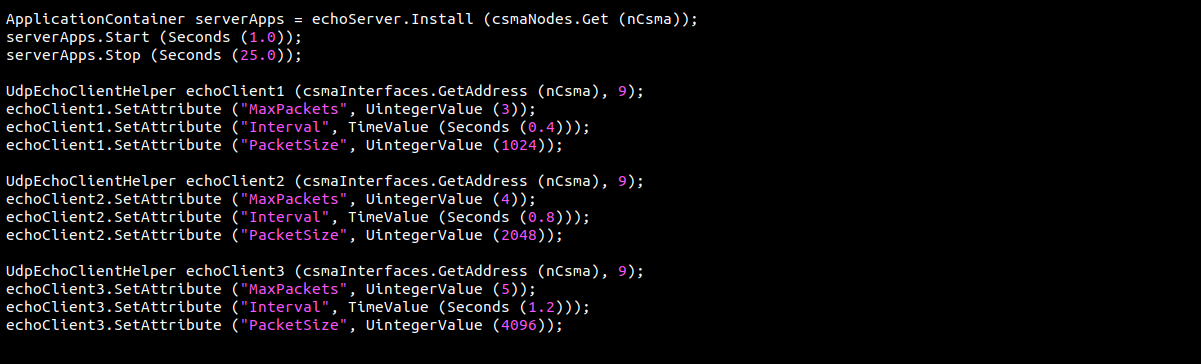

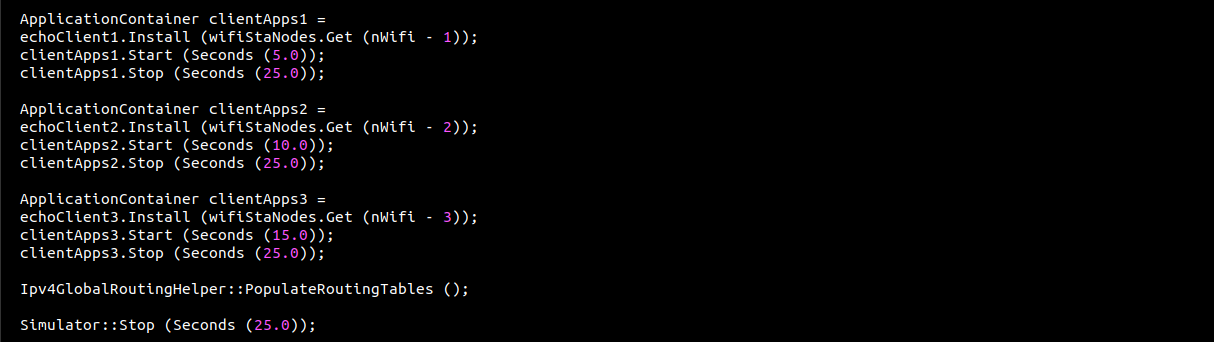

Acessando o diretório **cd ns3-Eclipse** e executando o script **handsON03p1_3** por meio do comando **./waf**, obtemos o seguinte resultado da simulação.

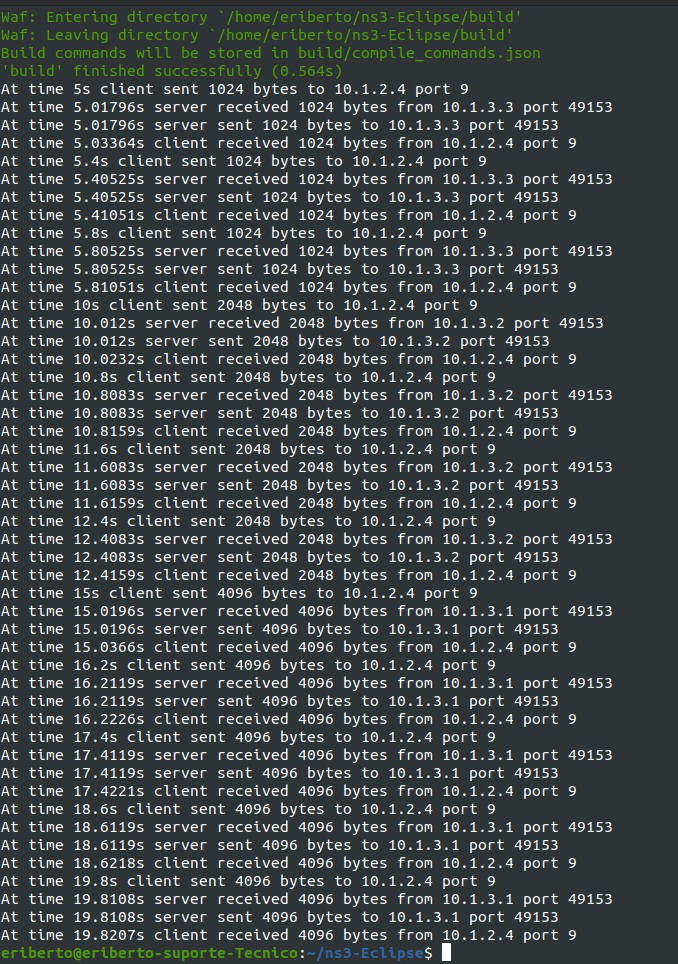

**Parte 1.4 : Criar outra aplicação que repondem em portas e tempos diferentes**

Para finalizar a prática 1, precisaremos fazer as seguintes alterações:

Criar o segundo segundo servidor que irá responder na porta 7.

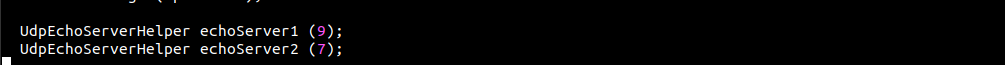

Como ambas possuem o mesmo tempo de execução, basta apenas instalar abas no penúltimo nó da rede em barramento, sem criar novos objetos, através do método **.add.**.

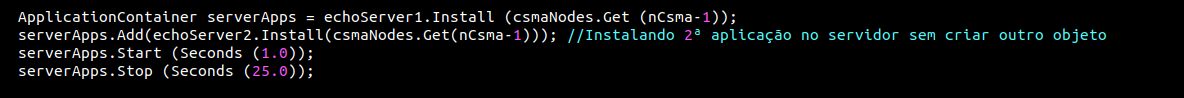

Alteramos apenas a aplicação a ser instalada no antepenúltimo nó da rede.

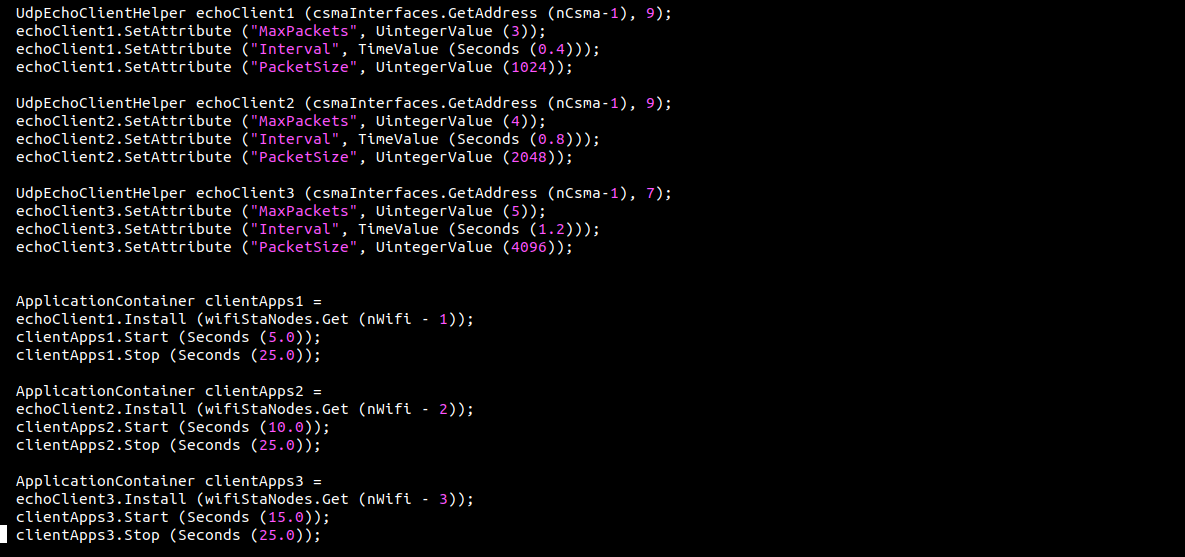

O resultado da simulação é apresentado a seguir.

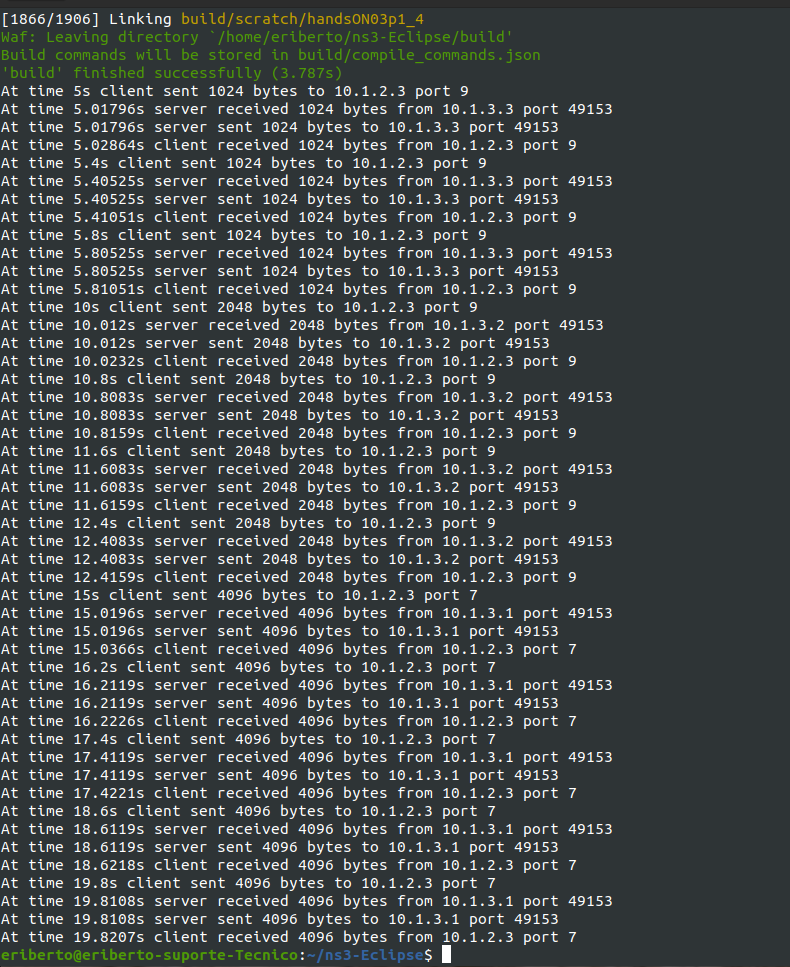

# Prática 02: Uso do NetAnim para verificar o movimento dos usuários

O NetANim é um um software independente que utiliza arquivos de rastreamento gerados durante simulações do ns-3 para exibir a topologia de rede e criar uma animação do fluxo de pacotes entre os nós (móveis ou estacionários).\

A classe **ns3::AnimationInterface** é a responsável pela criação do arquivo de rastreamento no formato .xml.\
A classe registra o fluxo de pacote apenas se houver o evento de recepção de pacote.\
Sendo assim, cada evento de transmissão deve estar ligado a um evento de recepção.\

Com o **NetAnim**, além de vizualizar o fluxo de pacotes, é possível visualizar e exportar tabelas, com possibilidade de uso de vários filtros.

Como fizemos apenas algumas alterações no código da prática 1, as mesmas serão pontuadas a seguir

Incluímos a classe **netanim-module.h**

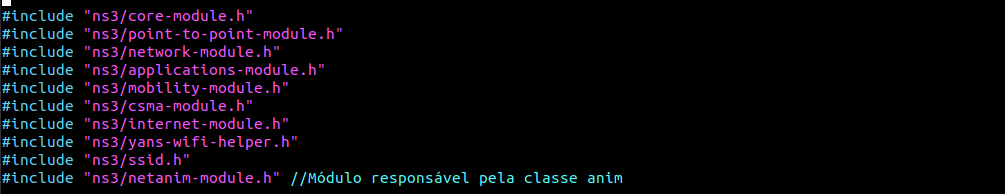

Adicionamos a linha **AnimationInterface anim** que será responsável pela geração do arquivo **.xml**, ou seja, rastrear o fluxo de pacotes e exportar os dados para o arquivo.\
Definimos o tempo logo abaixo.\
As mesmas devem ser adicionadas antes do **Simulator::Run()**.

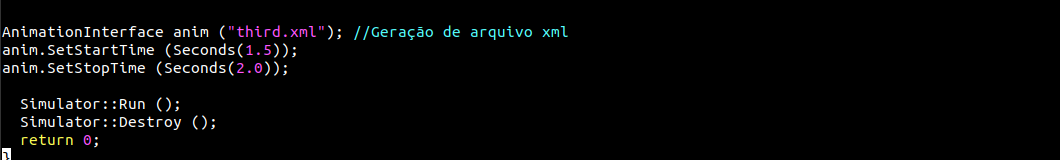

Instalamos o modelo de mobilidade em todos os nós estacionários para que funcione de forma correta.

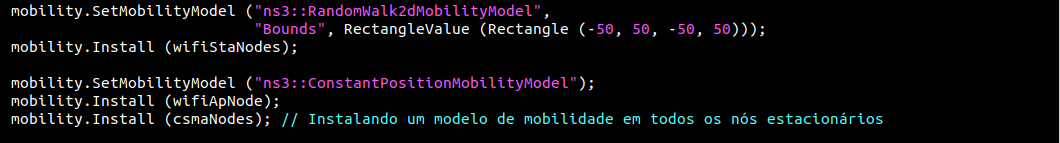

Acessando o diretório **cd ns3-Eclipse** e executando o script **handsON03p2** por meio do comando **./waf**, foi gerado um arquivo **handsON03p2.xml**.\
Executando o **NetAnim**, teremos:

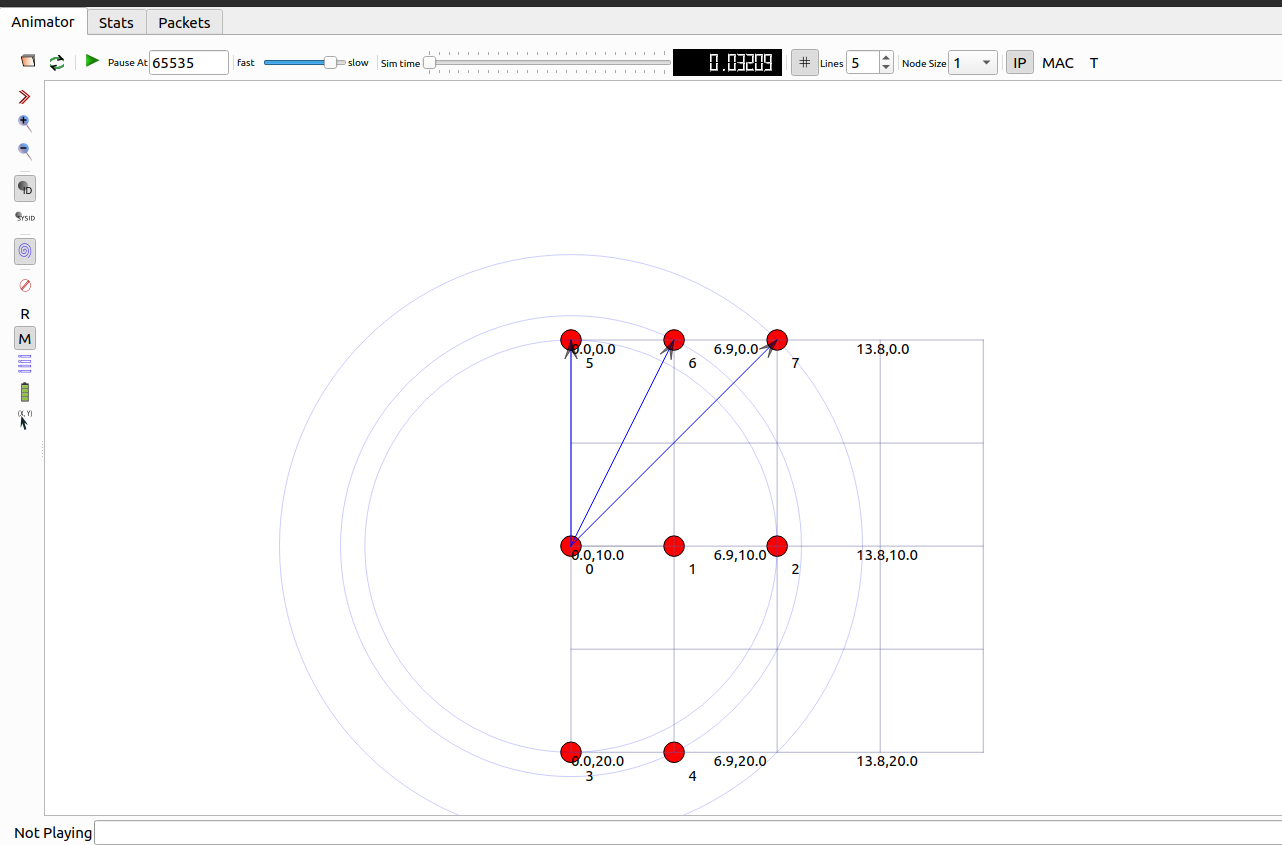

Explore as inúmeras opções oferecidas pelo software. Ativando a opção "IP" é possível visualizar o número IP de cada nó. Para visualizar o fluxo de pacotes e movimentos dos nós, clique na seta verde. Você também pode vizualizar o fluxo passo-a-passo, utilizando uma das opções na barra de ferramentas ao lado esquerdo (explore).

Na aba Packets é possível visualizar tabelas com o fluxo de pacotes, informando transmissor, receptor e tempo. É possível filtrar para que a tabela contenha apenas certos tipos de pacotes, ou pacotes relacionados à apenas um conjunto específico de nós. Note que sem nenhum filtro a tabela possui 48 pacotes.

Se habilitarmos o **EnablePacketMetadata** podemos ver informações relacionadas ao tipo de pacote.

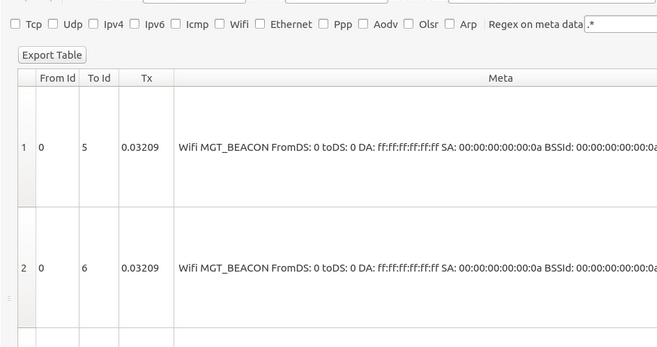